# Warning

CatBoost is hosted in Russia via Yandex servers. Please do access [catboost.ai](catboost.ai) with care.

# CatBoost Test

This notebook will contain a sample use of the XGBoost library to determine feasibility in use for the study 

**[Evaluation and Comparison of Boosted ML Models in Behavior-Based Malware Detection]**

## GPU Support

CatBoost supports training on GPUs. Refer to this [link](https://catboost.ai/en/docs/features/training-on-gpu) for more information.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split #For Splitting Datasets
from sklearn import preprocessing #For LabelEncoding
from sklearn.metrics import classification_report #For Classification Report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #For Confusion Matrix
import matplotlib.pyplot as plt #For figure plotting.
from sklearn.model_selection import RandomizedSearchCV #For automated hyperparameter tuning; Would be better if it was GridSearchCV

# 1. Installation

*This test will only use Python version of XGBoost. There are two ways it could be installed which are through Python's pip or Conda (via Anaconda). For this test we'll be using Python via Anaconda instead.*

1. Open your Anaconda Terminal
2. Enter `pip install catboost`

# 2. Verifying Library Installation

*As long as it does not show an error upon importing, it means that it works*

In [2]:
#Verifying installation of XGBoost
import catboost as catb

# 3. Sample Dataset

*For this sample, the [crops dataset](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset) similar in [this notebook](https://github.com/jm55/CSINTSY-MCO-5/blob/main/Machine%20Learning/notebook-v2.2.ipynb) will be ued in this demo.*

In [3]:
crops_df = pd.read_csv('crops_dataset.csv')
crops_df

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
len(crops_df['label'].unique())

22

## Reminder

Note that the dataset is a multi-class dataset which means that the output is not simply 0 or 1 like the case of the official thesis document. Hence, there will be some differences in the real study.

# 4. Implementing XGBoost Classifier

*This demonstrates the use of the SKLearn like implementation/use of XGBoost with the other parameters as well as other related functions and properties is as shown in this [link](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)*.

Sample Complete Parameters (not all are included in the example):

`catb.CatBoostClassifier(iterations=None, learning_rate=None, depth=None, l2_leaf_reg=None, model_size_reg=None, rsm=None, loss_function=None, border_count=None, feature_border_type=None, per_float_feature_quantization=None, input_borders=None, output_borders=None, fold_permutation_block=None, od_pval=None, od_wait=None, od_type=None, nan_mode=None, counter_calc_method=None, leaf_estimation_iterations=None, leaf_estimation_method=None, thread_count=None, random_seed=None, use_best_model=None, verbose=None, logging_level=None, metric_period=None, ctr_leaf_count_limit=None, store_all_simple_ctr=None, max_ctr_complexity=None, has_time=None, allow_const_label=None, classes_count=None, class_weights=None, auto_class_weights=None, one_hot_max_size=None, random_strength=None, name=None, ignored_features=None, train_dir=None, custom_loss=None, custom_metric=None, eval_metric=None, bagging_temperature=None, save_snapshot=None, snapshot_file=None, snapshot_interval=None, fold_len_multiplier=None, used_ram_limit=None, gpu_ram_part=None, allow_writing_files=None, final_ctr_computation_mode=None, approx_on_full_history=None, boosting_type=None, simple_ctr=None, combinations_ctr=None, per_feature_ctr=None, task_type=None, device_config=None, devices=None, bootstrap_type=None, subsample=None, sampling_unit=None, dev_score_calc_obj_block_size=None, max_depth=None, n_estimators=None, num_boost_round=None, num_trees=None, colsample_bylevel=None, random_state=None, reg_lambda=None, objective=None, eta=None, max_bin=None, scale_pos_weight=None, gpu_cat_features_storage=None, data_partition=None metadata=None, early_stopping_rounds=None, cat_features=None, grow_policy=None, min_data_in_leaf=None, min_child_samples=None, max_leaves=None, num_leaves=None, score_function=None, leaf_estimation_backtracking=None, ctr_history_unit=None, monotone_constraints=None, feature_weights=None, penalties_coefficient=None, first_feature_use_penalties=None, model_shrink_rate=None, model_shrink_mode=None, langevin=None, diffusion_temperature=None, posterior_sampling=None, boost_from_average=None, text_features=None, tokenizers=None, dictionaries=None, feature_calcers=None, text_processing=None, fixed_binary_splits=None)`

## 4.1. Loading Classifier

In [5]:
#Loading XGBClassifier as an object
catbClassifier = catb.CatBoostClassifier()

## 4.2. Splitting Datasets to Train and Test Datasets

In [6]:
#Splitting datasets to train and test datasets
features = crops_df.columns.to_list()
features = features[0:len(features)-2]

le = preprocessing.LabelEncoder()
labels = le.fit_transform(crops_df['label']) #Converting t

X,y = crops_df[features],labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 4.3. Loading Hyperparameter Tuning

Parameters: https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier

Note that the hyperparameter values shown in the tuning choices here are not complete as some values were ommited due to errors or to improve tuning speed relative to the available hardware. 

Booster `'dart'` may be better performing but at the extreme cost of time as tests suggests that it runs at ~30mins each iteration during RandomizedSearchCV, hence it was removed on this demo.

In [7]:
param = {'sampling_frequency':['PerTree','PerTreeLevel'], 'learning_rate': [0.01], 'depth': [4, 6, 10], 
         'l2_leaf_reg': [1, 3, 5, 7, 9], 'thread_count':[-1], 'classes_count':[22], 
         'grow_policy':['SymmetricTree','Depthwise','Lossguide'],
         'auto_class_weights':['Balanced','SqrtBalanced']}

tuner = RandomizedSearchCV(catbClassifier, param, verbose=2, n_jobs=2, cv=5, refit=True, error_score=0, random_state=1)
tuner.fit(X_train,y_train)
print("Best Score:", tuner.best_score_)
print("Best Params:", tuner.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 2.9933720	total: 276ms	remaining: 4m 35s
1:	learn: 2.8992817	total: 399ms	remaining: 3m 19s
2:	learn: 2.8122305	total: 533ms	remaining: 2m 57s
3:	learn: 2.7323634	total: 631ms	remaining: 2m 37s
4:	learn: 2.6563670	total: 754ms	remaining: 2m 29s
5:	learn: 2.5850877	total: 886ms	remaining: 2m 26s
6:	learn: 2.5136362	total: 1.01s	remaining: 2m 23s
7:	learn: 2.4454474	total: 1.12s	remaining: 2m 18s
8:	learn: 2.3863294	total: 1.26s	remaining: 2m 19s
9:	learn: 2.3254908	total: 1.37s	remaining: 2m 16s
10:	learn: 2.2694948	total: 1.5s	remaining: 2m 14s
11:	learn: 2.2174157	total: 1.62s	remaining: 2m 13s
12:	learn: 2.1683339	total: 1.76s	remaining: 2m 13s
13:	learn: 2.1209180	total: 1.9s	remaining: 2m 13s
14:	learn: 2.0767391	total: 2.09s	remaining: 2m 17s
15:	learn: 2.0339791	total: 2.23s	remaining: 2m 17s
16:	learn: 1.9922786	total: 2.4s	remaining: 2m 18s
17:	learn: 1.9529597	total: 2.52s	remaining: 2m 17s
18:	learn: 1.914

157:	learn: 0.3944195	total: 19.5s	remaining: 1m 43s
158:	learn: 0.3911655	total: 19.6s	remaining: 1m 43s
159:	learn: 0.3880231	total: 19.7s	remaining: 1m 43s
160:	learn: 0.3849633	total: 19.8s	remaining: 1m 43s
161:	learn: 0.3818133	total: 19.9s	remaining: 1m 42s
162:	learn: 0.3787430	total: 20s	remaining: 1m 42s
163:	learn: 0.3758538	total: 20.1s	remaining: 1m 42s
164:	learn: 0.3729046	total: 20.2s	remaining: 1m 42s
165:	learn: 0.3698642	total: 20.4s	remaining: 1m 42s
166:	learn: 0.3670132	total: 20.5s	remaining: 1m 42s
167:	learn: 0.3640908	total: 20.6s	remaining: 1m 41s
168:	learn: 0.3612690	total: 20.7s	remaining: 1m 41s
169:	learn: 0.3585407	total: 20.8s	remaining: 1m 41s
170:	learn: 0.3557667	total: 20.9s	remaining: 1m 41s
171:	learn: 0.3531341	total: 21s	remaining: 1m 41s
172:	learn: 0.3503900	total: 21.1s	remaining: 1m 40s
173:	learn: 0.3476301	total: 21.2s	remaining: 1m 40s
174:	learn: 0.3450307	total: 21.4s	remaining: 1m 40s
175:	learn: 0.3426063	total: 21.5s	remaining: 1m 4

314:	learn: 0.1401948	total: 39.4s	remaining: 1m 25s
315:	learn: 0.1393976	total: 39.6s	remaining: 1m 25s
316:	learn: 0.1386703	total: 39.7s	remaining: 1m 25s
317:	learn: 0.1379597	total: 39.9s	remaining: 1m 25s
318:	learn: 0.1372078	total: 40.1s	remaining: 1m 25s
319:	learn: 0.1365088	total: 40.2s	remaining: 1m 25s
320:	learn: 0.1358196	total: 40.3s	remaining: 1m 25s
321:	learn: 0.1351640	total: 40.5s	remaining: 1m 25s
322:	learn: 0.1344554	total: 40.7s	remaining: 1m 25s
323:	learn: 0.1337715	total: 40.8s	remaining: 1m 25s
324:	learn: 0.1330566	total: 41s	remaining: 1m 25s
325:	learn: 0.1323578	total: 41.1s	remaining: 1m 25s
326:	learn: 0.1316290	total: 41.3s	remaining: 1m 25s
327:	learn: 0.1309772	total: 41.5s	remaining: 1m 25s
328:	learn: 0.1303099	total: 41.6s	remaining: 1m 24s
329:	learn: 0.1296498	total: 41.8s	remaining: 1m 24s
330:	learn: 0.1289979	total: 41.9s	remaining: 1m 24s
331:	learn: 0.1283516	total: 42s	remaining: 1m 24s
332:	learn: 0.1277584	total: 42.2s	remaining: 1m 2

470:	learn: 0.0698615	total: 1m 1s	remaining: 1m 8s
471:	learn: 0.0695922	total: 1m 1s	remaining: 1m 8s
472:	learn: 0.0693511	total: 1m 1s	remaining: 1m 8s
473:	learn: 0.0690768	total: 1m 1s	remaining: 1m 8s
474:	learn: 0.0688182	total: 1m 1s	remaining: 1m 8s
475:	learn: 0.0685742	total: 1m 1s	remaining: 1m 8s
476:	learn: 0.0683180	total: 1m 1s	remaining: 1m 7s
477:	learn: 0.0680492	total: 1m 2s	remaining: 1m 7s
478:	learn: 0.0678144	total: 1m 2s	remaining: 1m 7s
479:	learn: 0.0675760	total: 1m 2s	remaining: 1m 7s
480:	learn: 0.0673057	total: 1m 2s	remaining: 1m 7s
481:	learn: 0.0670900	total: 1m 2s	remaining: 1m 7s
482:	learn: 0.0668315	total: 1m 2s	remaining: 1m 7s
483:	learn: 0.0665872	total: 1m 2s	remaining: 1m 7s
484:	learn: 0.0663644	total: 1m 3s	remaining: 1m 6s
485:	learn: 0.0661031	total: 1m 3s	remaining: 1m 6s
486:	learn: 0.0658747	total: 1m 3s	remaining: 1m 6s
487:	learn: 0.0656198	total: 1m 3s	remaining: 1m 6s
488:	learn: 0.0653601	total: 1m 3s	remaining: 1m 6s
489:	learn: 

627:	learn: 0.0416076	total: 1m 26s	remaining: 51.5s
628:	learn: 0.0414907	total: 1m 27s	remaining: 51.4s
629:	learn: 0.0413865	total: 1m 27s	remaining: 51.3s
630:	learn: 0.0412668	total: 1m 27s	remaining: 51.2s
631:	learn: 0.0411405	total: 1m 27s	remaining: 51.1s
632:	learn: 0.0410173	total: 1m 27s	remaining: 50.9s
633:	learn: 0.0409009	total: 1m 28s	remaining: 50.8s
634:	learn: 0.0407829	total: 1m 28s	remaining: 50.7s
635:	learn: 0.0406623	total: 1m 28s	remaining: 50.6s
636:	learn: 0.0405576	total: 1m 28s	remaining: 50.5s
637:	learn: 0.0404516	total: 1m 28s	remaining: 50.3s
638:	learn: 0.0403347	total: 1m 28s	remaining: 50.2s
639:	learn: 0.0402139	total: 1m 28s	remaining: 50.1s
640:	learn: 0.0400938	total: 1m 29s	remaining: 49.9s
641:	learn: 0.0399853	total: 1m 29s	remaining: 49.8s
642:	learn: 0.0398766	total: 1m 29s	remaining: 49.7s
643:	learn: 0.0397567	total: 1m 29s	remaining: 49.5s
644:	learn: 0.0396339	total: 1m 29s	remaining: 49.4s
645:	learn: 0.0395178	total: 1m 29s	remaining:

783:	learn: 0.0275697	total: 1m 53s	remaining: 31.1s
784:	learn: 0.0275026	total: 1m 53s	remaining: 31s
785:	learn: 0.0274419	total: 1m 53s	remaining: 30.9s
786:	learn: 0.0273704	total: 1m 53s	remaining: 30.7s
787:	learn: 0.0273096	total: 1m 53s	remaining: 30.6s
788:	learn: 0.0272367	total: 1m 53s	remaining: 30.4s
789:	learn: 0.0271731	total: 1m 53s	remaining: 30.3s
790:	learn: 0.0271059	total: 1m 54s	remaining: 30.2s
791:	learn: 0.0270427	total: 1m 54s	remaining: 30.1s
792:	learn: 0.0269779	total: 1m 54s	remaining: 29.9s
793:	learn: 0.0269025	total: 1m 54s	remaining: 29.8s
794:	learn: 0.0268452	total: 1m 54s	remaining: 29.6s
795:	learn: 0.0267767	total: 1m 55s	remaining: 29.5s
796:	learn: 0.0267143	total: 1m 55s	remaining: 29.3s
797:	learn: 0.0266611	total: 1m 55s	remaining: 29.2s
798:	learn: 0.0265971	total: 1m 55s	remaining: 29s
799:	learn: 0.0265352	total: 1m 55s	remaining: 28.9s
800:	learn: 0.0264688	total: 1m 55s	remaining: 28.8s
801:	learn: 0.0264078	total: 1m 55s	remaining: 28.

941:	learn: 0.0195623	total: 2m 17s	remaining: 8.49s
942:	learn: 0.0195184	total: 2m 18s	remaining: 8.35s
943:	learn: 0.0194805	total: 2m 18s	remaining: 8.2s
944:	learn: 0.0194424	total: 2m 18s	remaining: 8.06s
945:	learn: 0.0194111	total: 2m 18s	remaining: 7.91s
946:	learn: 0.0193722	total: 2m 18s	remaining: 7.76s
947:	learn: 0.0193404	total: 2m 18s	remaining: 7.62s
948:	learn: 0.0193076	total: 2m 19s	remaining: 7.47s
949:	learn: 0.0192750	total: 2m 19s	remaining: 7.33s
950:	learn: 0.0192360	total: 2m 19s	remaining: 7.18s
951:	learn: 0.0191968	total: 2m 19s	remaining: 7.04s
952:	learn: 0.0191621	total: 2m 19s	remaining: 6.89s
953:	learn: 0.0191239	total: 2m 19s	remaining: 6.75s
954:	learn: 0.0190880	total: 2m 20s	remaining: 6.6s
955:	learn: 0.0190521	total: 2m 20s	remaining: 6.45s
956:	learn: 0.0190125	total: 2m 20s	remaining: 6.31s
957:	learn: 0.0189806	total: 2m 20s	remaining: 6.16s
958:	learn: 0.0189446	total: 2m 20s	remaining: 6.02s
959:	learn: 0.0189129	total: 2m 20s	remaining: 5

## 4.4. Loading Tuned Parameters to Model

In [8]:
#Reloading model with better parameters
catbClassifier = catb.CatBoostClassifier(**tuner.best_params_)

#Fitting/Training model
catbClassifier.fit(X_train, y_train)

0:	learn: 2.9933720	total: 126ms	remaining: 2m 5s
1:	learn: 2.8992817	total: 234ms	remaining: 1m 56s
2:	learn: 2.8122305	total: 358ms	remaining: 1m 59s
3:	learn: 2.7323634	total: 470ms	remaining: 1m 56s
4:	learn: 2.6563670	total: 591ms	remaining: 1m 57s
5:	learn: 2.5850877	total: 799ms	remaining: 2m 12s
6:	learn: 2.5136362	total: 924ms	remaining: 2m 11s
7:	learn: 2.4454474	total: 1.04s	remaining: 2m 9s
8:	learn: 2.3863294	total: 1.22s	remaining: 2m 14s
9:	learn: 2.3254908	total: 1.33s	remaining: 2m 12s
10:	learn: 2.2694948	total: 1.51s	remaining: 2m 16s
11:	learn: 2.2174157	total: 1.66s	remaining: 2m 16s
12:	learn: 2.1683339	total: 1.87s	remaining: 2m 21s
13:	learn: 2.1209180	total: 2.02s	remaining: 2m 22s
14:	learn: 2.0767391	total: 2.24s	remaining: 2m 26s
15:	learn: 2.0339791	total: 2.42s	remaining: 2m 28s
16:	learn: 1.9922786	total: 2.59s	remaining: 2m 29s
17:	learn: 1.9529597	total: 2.72s	remaining: 2m 28s
18:	learn: 1.9142188	total: 2.85s	remaining: 2m 27s
19:	learn: 1.8764775	tot

159:	learn: 0.3880231	total: 21.4s	remaining: 1m 52s
160:	learn: 0.3849633	total: 21.6s	remaining: 1m 52s
161:	learn: 0.3818133	total: 21.7s	remaining: 1m 52s
162:	learn: 0.3787430	total: 21.8s	remaining: 1m 51s
163:	learn: 0.3758538	total: 22s	remaining: 1m 51s
164:	learn: 0.3729046	total: 22.1s	remaining: 1m 51s
165:	learn: 0.3698642	total: 22.3s	remaining: 1m 51s
166:	learn: 0.3670132	total: 22.4s	remaining: 1m 51s
167:	learn: 0.3640908	total: 22.6s	remaining: 1m 51s
168:	learn: 0.3612690	total: 22.7s	remaining: 1m 51s
169:	learn: 0.3585407	total: 22.9s	remaining: 1m 51s
170:	learn: 0.3557667	total: 23s	remaining: 1m 51s
171:	learn: 0.3531341	total: 23.1s	remaining: 1m 51s
172:	learn: 0.3503900	total: 23.3s	remaining: 1m 51s
173:	learn: 0.3476301	total: 23.4s	remaining: 1m 51s
174:	learn: 0.3450307	total: 23.5s	remaining: 1m 50s
175:	learn: 0.3426063	total: 23.7s	remaining: 1m 50s
176:	learn: 0.3398547	total: 23.8s	remaining: 1m 50s
177:	learn: 0.3372058	total: 23.9s	remaining: 1m 5

316:	learn: 0.1386703	total: 42.8s	remaining: 1m 32s
317:	learn: 0.1379597	total: 42.9s	remaining: 1m 32s
318:	learn: 0.1372078	total: 43.1s	remaining: 1m 32s
319:	learn: 0.1365088	total: 43.3s	remaining: 1m 31s
320:	learn: 0.1358196	total: 43.4s	remaining: 1m 31s
321:	learn: 0.1351640	total: 43.6s	remaining: 1m 31s
322:	learn: 0.1344554	total: 43.7s	remaining: 1m 31s
323:	learn: 0.1337715	total: 43.9s	remaining: 1m 31s
324:	learn: 0.1330566	total: 44.1s	remaining: 1m 31s
325:	learn: 0.1323578	total: 44.3s	remaining: 1m 31s
326:	learn: 0.1316290	total: 44.5s	remaining: 1m 31s
327:	learn: 0.1309772	total: 44.7s	remaining: 1m 31s
328:	learn: 0.1303099	total: 44.8s	remaining: 1m 31s
329:	learn: 0.1296498	total: 45s	remaining: 1m 31s
330:	learn: 0.1289979	total: 45.1s	remaining: 1m 31s
331:	learn: 0.1283516	total: 45.3s	remaining: 1m 31s
332:	learn: 0.1277584	total: 45.5s	remaining: 1m 31s
333:	learn: 0.1271407	total: 45.6s	remaining: 1m 30s
334:	learn: 0.1265314	total: 45.7s	remaining: 1m

472:	learn: 0.0693511	total: 1m 5s	remaining: 1m 13s
473:	learn: 0.0690768	total: 1m 5s	remaining: 1m 13s
474:	learn: 0.0688182	total: 1m 5s	remaining: 1m 12s
475:	learn: 0.0685742	total: 1m 6s	remaining: 1m 12s
476:	learn: 0.0683180	total: 1m 6s	remaining: 1m 12s
477:	learn: 0.0680492	total: 1m 6s	remaining: 1m 12s
478:	learn: 0.0678144	total: 1m 6s	remaining: 1m 12s
479:	learn: 0.0675760	total: 1m 6s	remaining: 1m 12s
480:	learn: 0.0673057	total: 1m 6s	remaining: 1m 11s
481:	learn: 0.0670900	total: 1m 6s	remaining: 1m 11s
482:	learn: 0.0668315	total: 1m 6s	remaining: 1m 11s
483:	learn: 0.0665872	total: 1m 7s	remaining: 1m 11s
484:	learn: 0.0663644	total: 1m 7s	remaining: 1m 11s
485:	learn: 0.0661031	total: 1m 7s	remaining: 1m 11s
486:	learn: 0.0658747	total: 1m 7s	remaining: 1m 11s
487:	learn: 0.0656198	total: 1m 7s	remaining: 1m 10s
488:	learn: 0.0653601	total: 1m 7s	remaining: 1m 10s
489:	learn: 0.0651207	total: 1m 7s	remaining: 1m 10s
490:	learn: 0.0648734	total: 1m 7s	remaining: 

629:	learn: 0.0413865	total: 1m 27s	remaining: 51.2s
630:	learn: 0.0412668	total: 1m 27s	remaining: 51.1s
631:	learn: 0.0411405	total: 1m 27s	remaining: 50.9s
632:	learn: 0.0410173	total: 1m 27s	remaining: 50.8s
633:	learn: 0.0409009	total: 1m 27s	remaining: 50.7s
634:	learn: 0.0407829	total: 1m 27s	remaining: 50.5s
635:	learn: 0.0406623	total: 1m 28s	remaining: 50.4s
636:	learn: 0.0405576	total: 1m 28s	remaining: 50.2s
637:	learn: 0.0404516	total: 1m 28s	remaining: 50.1s
638:	learn: 0.0403347	total: 1m 28s	remaining: 49.9s
639:	learn: 0.0402139	total: 1m 28s	remaining: 49.8s
640:	learn: 0.0400938	total: 1m 28s	remaining: 49.7s
641:	learn: 0.0399853	total: 1m 28s	remaining: 49.5s
642:	learn: 0.0398766	total: 1m 28s	remaining: 49.4s
643:	learn: 0.0397567	total: 1m 29s	remaining: 49.3s
644:	learn: 0.0396339	total: 1m 29s	remaining: 49.1s
645:	learn: 0.0395178	total: 1m 29s	remaining: 49s
646:	learn: 0.0394060	total: 1m 29s	remaining: 48.9s
647:	learn: 0.0392909	total: 1m 29s	remaining: 4

786:	learn: 0.0273704	total: 1m 49s	remaining: 29.6s
787:	learn: 0.0273096	total: 1m 49s	remaining: 29.4s
788:	learn: 0.0272367	total: 1m 49s	remaining: 29.3s
789:	learn: 0.0271731	total: 1m 49s	remaining: 29.1s
790:	learn: 0.0271059	total: 1m 49s	remaining: 29s
791:	learn: 0.0270427	total: 1m 50s	remaining: 28.9s
792:	learn: 0.0269779	total: 1m 50s	remaining: 28.7s
793:	learn: 0.0269025	total: 1m 50s	remaining: 28.6s
794:	learn: 0.0268452	total: 1m 50s	remaining: 28.5s
795:	learn: 0.0267767	total: 1m 50s	remaining: 28.3s
796:	learn: 0.0267143	total: 1m 50s	remaining: 28.2s
797:	learn: 0.0266611	total: 1m 50s	remaining: 28s
798:	learn: 0.0265971	total: 1m 50s	remaining: 27.9s
799:	learn: 0.0265352	total: 1m 51s	remaining: 27.8s
800:	learn: 0.0264688	total: 1m 51s	remaining: 27.6s
801:	learn: 0.0264078	total: 1m 51s	remaining: 27.5s
802:	learn: 0.0263457	total: 1m 51s	remaining: 27.4s
803:	learn: 0.0262880	total: 1m 51s	remaining: 27.2s
804:	learn: 0.0262242	total: 1m 51s	remaining: 27.

944:	learn: 0.0194424	total: 2m 12s	remaining: 7.71s
945:	learn: 0.0194111	total: 2m 12s	remaining: 7.57s
946:	learn: 0.0193722	total: 2m 12s	remaining: 7.42s
947:	learn: 0.0193404	total: 2m 12s	remaining: 7.28s
948:	learn: 0.0193076	total: 2m 12s	remaining: 7.15s
949:	learn: 0.0192750	total: 2m 13s	remaining: 7.01s
950:	learn: 0.0192360	total: 2m 13s	remaining: 6.87s
951:	learn: 0.0191968	total: 2m 13s	remaining: 6.72s
952:	learn: 0.0191621	total: 2m 13s	remaining: 6.59s
953:	learn: 0.0191239	total: 2m 13s	remaining: 6.45s
954:	learn: 0.0190880	total: 2m 13s	remaining: 6.31s
955:	learn: 0.0190521	total: 2m 14s	remaining: 6.17s
956:	learn: 0.0190125	total: 2m 14s	remaining: 6.03s
957:	learn: 0.0189806	total: 2m 14s	remaining: 5.89s
958:	learn: 0.0189446	total: 2m 14s	remaining: 5.75s
959:	learn: 0.0189129	total: 2m 14s	remaining: 5.61s
960:	learn: 0.0188800	total: 2m 14s	remaining: 5.47s
961:	learn: 0.0188489	total: 2m 14s	remaining: 5.33s
962:	learn: 0.0188112	total: 2m 15s	remaining:

## 4.5. Results

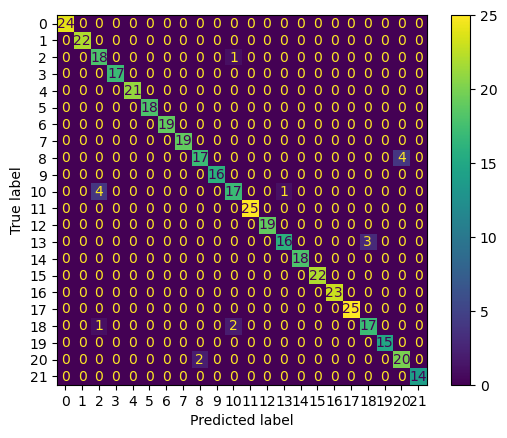

              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        24
      banana     1.0000    1.0000    1.0000        22
   blackgram     0.7826    0.9474    0.8571        19
    chickpea     1.0000    1.0000    1.0000        17
     coconut     1.0000    1.0000    1.0000        21
      coffee     1.0000    1.0000    1.0000        18
      cotton     1.0000    1.0000    1.0000        19
      grapes     1.0000    1.0000    1.0000        19
        jute     0.8947    0.8095    0.8500        21
 kidneybeans     1.0000    1.0000    1.0000        16
      lentil     0.8500    0.7727    0.8095        22
       maize     1.0000    1.0000    1.0000        25
       mango     1.0000    1.0000    1.0000        19
   mothbeans     0.9412    0.8421    0.8889        19
    mungbean     1.0000    1.0000    1.0000        18
   muskmelon     1.0000    1.0000    1.0000        22
      orange     1.0000    1.0000    1.0000        23
      papaya     1.0000    

C:\Users\ejose\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
#Testing Predictions
y_pred = catbClassifier.predict(X_test)

#Create confusion matrix
catb_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=catb_cm)
disp.plot()
plt.show()

#Converting LabelEncoded to String Labels
y_pred_str = le.inverse_transform(y_pred)
y_test_str = le.inverse_transform(y_test)

#Create classification report
catb_cr = classification_report(y_test_str, y_pred_str, digits=4)
print(catb_cr)